In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

import sys
sys.path.append('/path/to/cnn-interaction-interpretability/src')

from evaluation_functions import *
from visualization_functions import *

In [4]:
path = Path('/path/to/data') / 'Classification' / 'negative_sequences' 
attr = np.load(path /'distinct_1'/ 'contributions' / 'small_seed42_w_ig_N_1.npy')
pwm_model_w = np.load(path / 'data' / 'grammar'/ 'seqpwm_test_w.npy')

# Indices for sequeces containing a specific number of motifs
nr_motif_idx = {4: range(0,1500), 3: range(1500, 1900), 2: range(1900, 2500), 1: range(2500, 2900), 0: range(2900, 3000)}

Calculation of AUPRC values for each motif in each sequence.  
If motif not present in sequence --> NA

In [5]:
auc_df = auprc_df(attr, pwm_model_w, nr_motif_idx, 4)
auc_df.head()

1         2         3         4  nr_motifs
0  0.728090  0.676454  0.801015  0.116444          4
1  0.189081  0.608750  0.820468  0.384949          4
2  0.605881  0.213863  0.397782  0.035101          4
3  0.062545  0.572824  0.609522  0.750582          4
4  0.086637  0.135402  0.068521  0.734585          4

Rearranging for plotting

In [6]:
boxdf = box_auprc_neg(auc_df, exp='w', method = 'ig', nr_motif = 4)
boxdf.head()

AUPRC  Motif Method Experiment
0  0.728090    1.0     ig          w
1  0.189081    1.0     ig          w
2  0.605881    1.0     ig          w
3  0.062545    1.0     ig          w
4  0.086637    1.0     ig          w

In [ ]:
boxdf.to_csv(path / 'contributions' / 'auprc' / 'auprc.csv', index=False)

### Evaluation AUPRC (Boxplots)

In [5]:
datasets = ['SPI1', 'MEF2A', 'MAX', 'distinct_1', 'distinct_2']
motif_labels = {'SPI1':['MA0080.3', 'MA0080.4', 'MA0080.5', 'MA0080.6'], 
    'MEF2A':['MA0052.1', 'MA0052.2', 'MA0052.3', 'MA0052.4'], 
    'MAX':['MA0058.1', 'MA0058.2', 'MA0058.3', 'MA0059.1'], 
    'distinct_1':['MA0018.3', 'MA0048.1', 'MA0098.3', 'MA0090.3'], 
    'distinct_2':['MA0014.3','MA0062.3', 'MA0070.1', 'MA0102.3']
}
d = datasets[1]
refseq = 'N'
seeds = [42,43,44,45,46]
absolute = True
size = 'small']

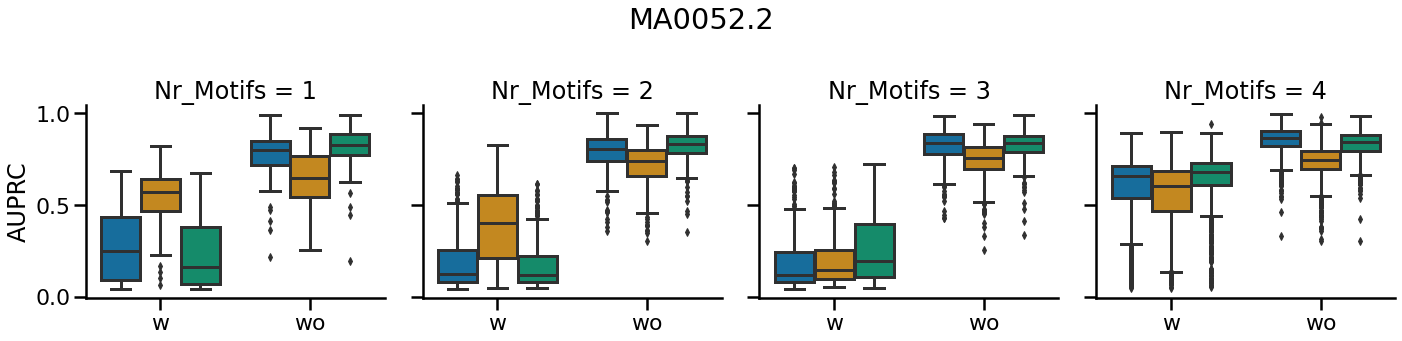

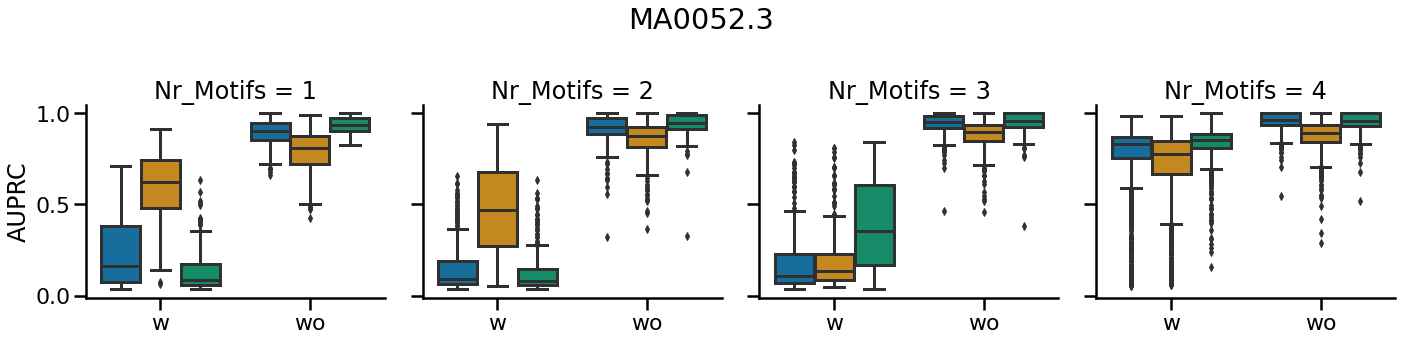

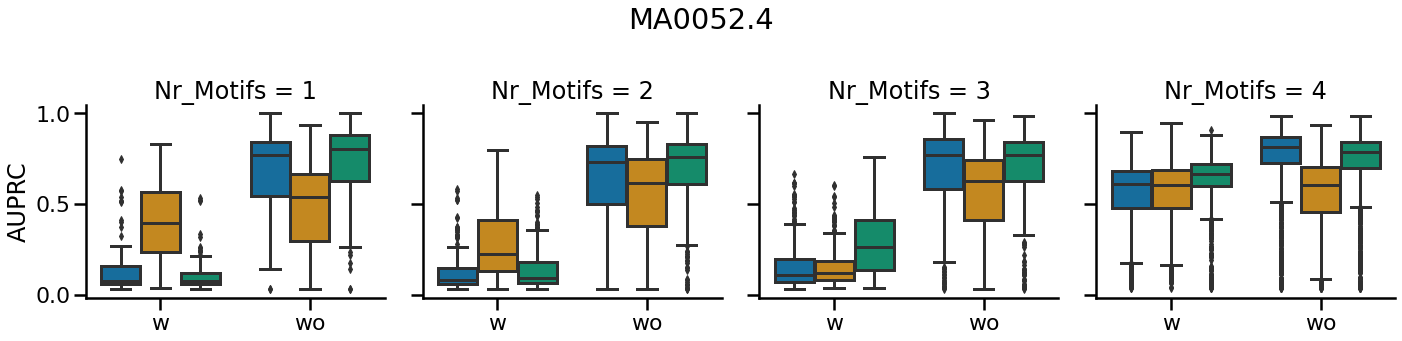

In [7]:
# Plot AUPRC
dataset = 'MEF2A'
size = 'small'
refseq = 'N'
data_path = path / dataset
filename = size+'_'+refseq+'_target1.npy'
plot_df = pd.read_csv(data_path / 'contributions' /'auprc' / filename)
for motif_id in range(1,5):
    filename=str(dataset+'_'+size+'_id_'+str(motif_id))
    if absolute:
        filename = filename + '_abs' +'.svg'
    else:
        filename = filename + '.svg'
    plot_single_motif(plot_df, motif_id, save_path = path / 'results' / 'auprc' / filename, title=motif_labels[dataset][motif_id-1])